In [6]:
import numpy as np
import math as m
from qiskit import Aer,QuantumCircuit, transpile
from qiskit.quantum_info import Statevector

In [7]:


one = np.array([0,0,1,0,0,0,0,1])
two = np.array([0,0,1,0,0,0,1,0])

#embed amplitudes of one to |0⟩ and two to |1⟩
embed = ((np.vstack((one,two)).T / [np.sqrt(np.sum(one**2)),np.sqrt(np.sum(two**2))]) / 2*[m.sqrt(2)]).flatten()

data = np.vstack((one,two)).T.flatten()

#prepare bell state one|0⟩ - two|1⟩
embedded = np.hstack((1/m.sqrt(2)*embed,-1/m.sqrt(2)*embed))

# combine subsystems  |+⟩ ⊗ (one|0⟩ - two|1⟩)
embedded = np.hstack((1/m.sqrt(2)*embedded,1/m.sqrt(2)*embedded))

print(data)

print(embed)

print(embedded)

[0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0]
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
[ 0.    0.    0.    0.    0.25  0.25  0.    0.    0.    0.    0.    0.
  0.    0.25  0.25  0.   -0.   -0.   -0.   -0.   -0.25 -0.25 -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.25 -0.25 -0.    0.    0.    0.    0.
  0.25  0.25  0.    0.    0.    0.    0.    0.    0.    0.25  0.25  0.
 -0.   -0.   -0.   -0.   -0.25 -0.25 -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.25 -0.25 -0.  ]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

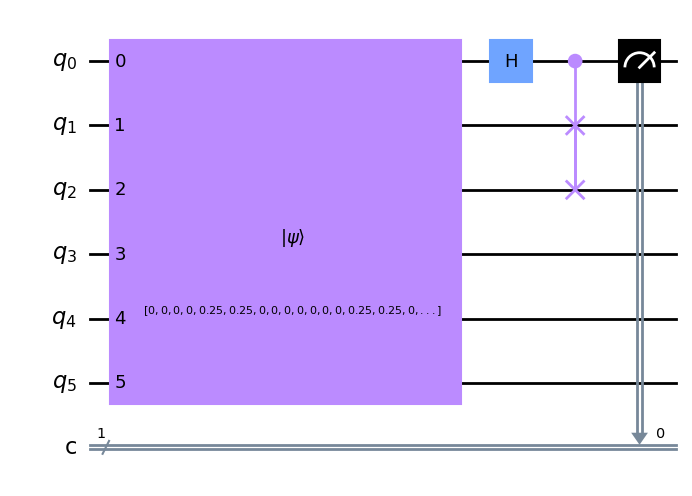

In [8]:

cos = QuantumCircuit(6,1)

cos.initialize(embedded,range(0,6))

#revert control subsystem from |+⟩ to |0⟩

cos.h(0)

display(Statevector(cos).draw("latex"))

cos.cswap(0, 1, 2)

display(Statevector(cos).draw("latex"))

cos.measure(0,0)

display(cos.draw(output="mpl"))

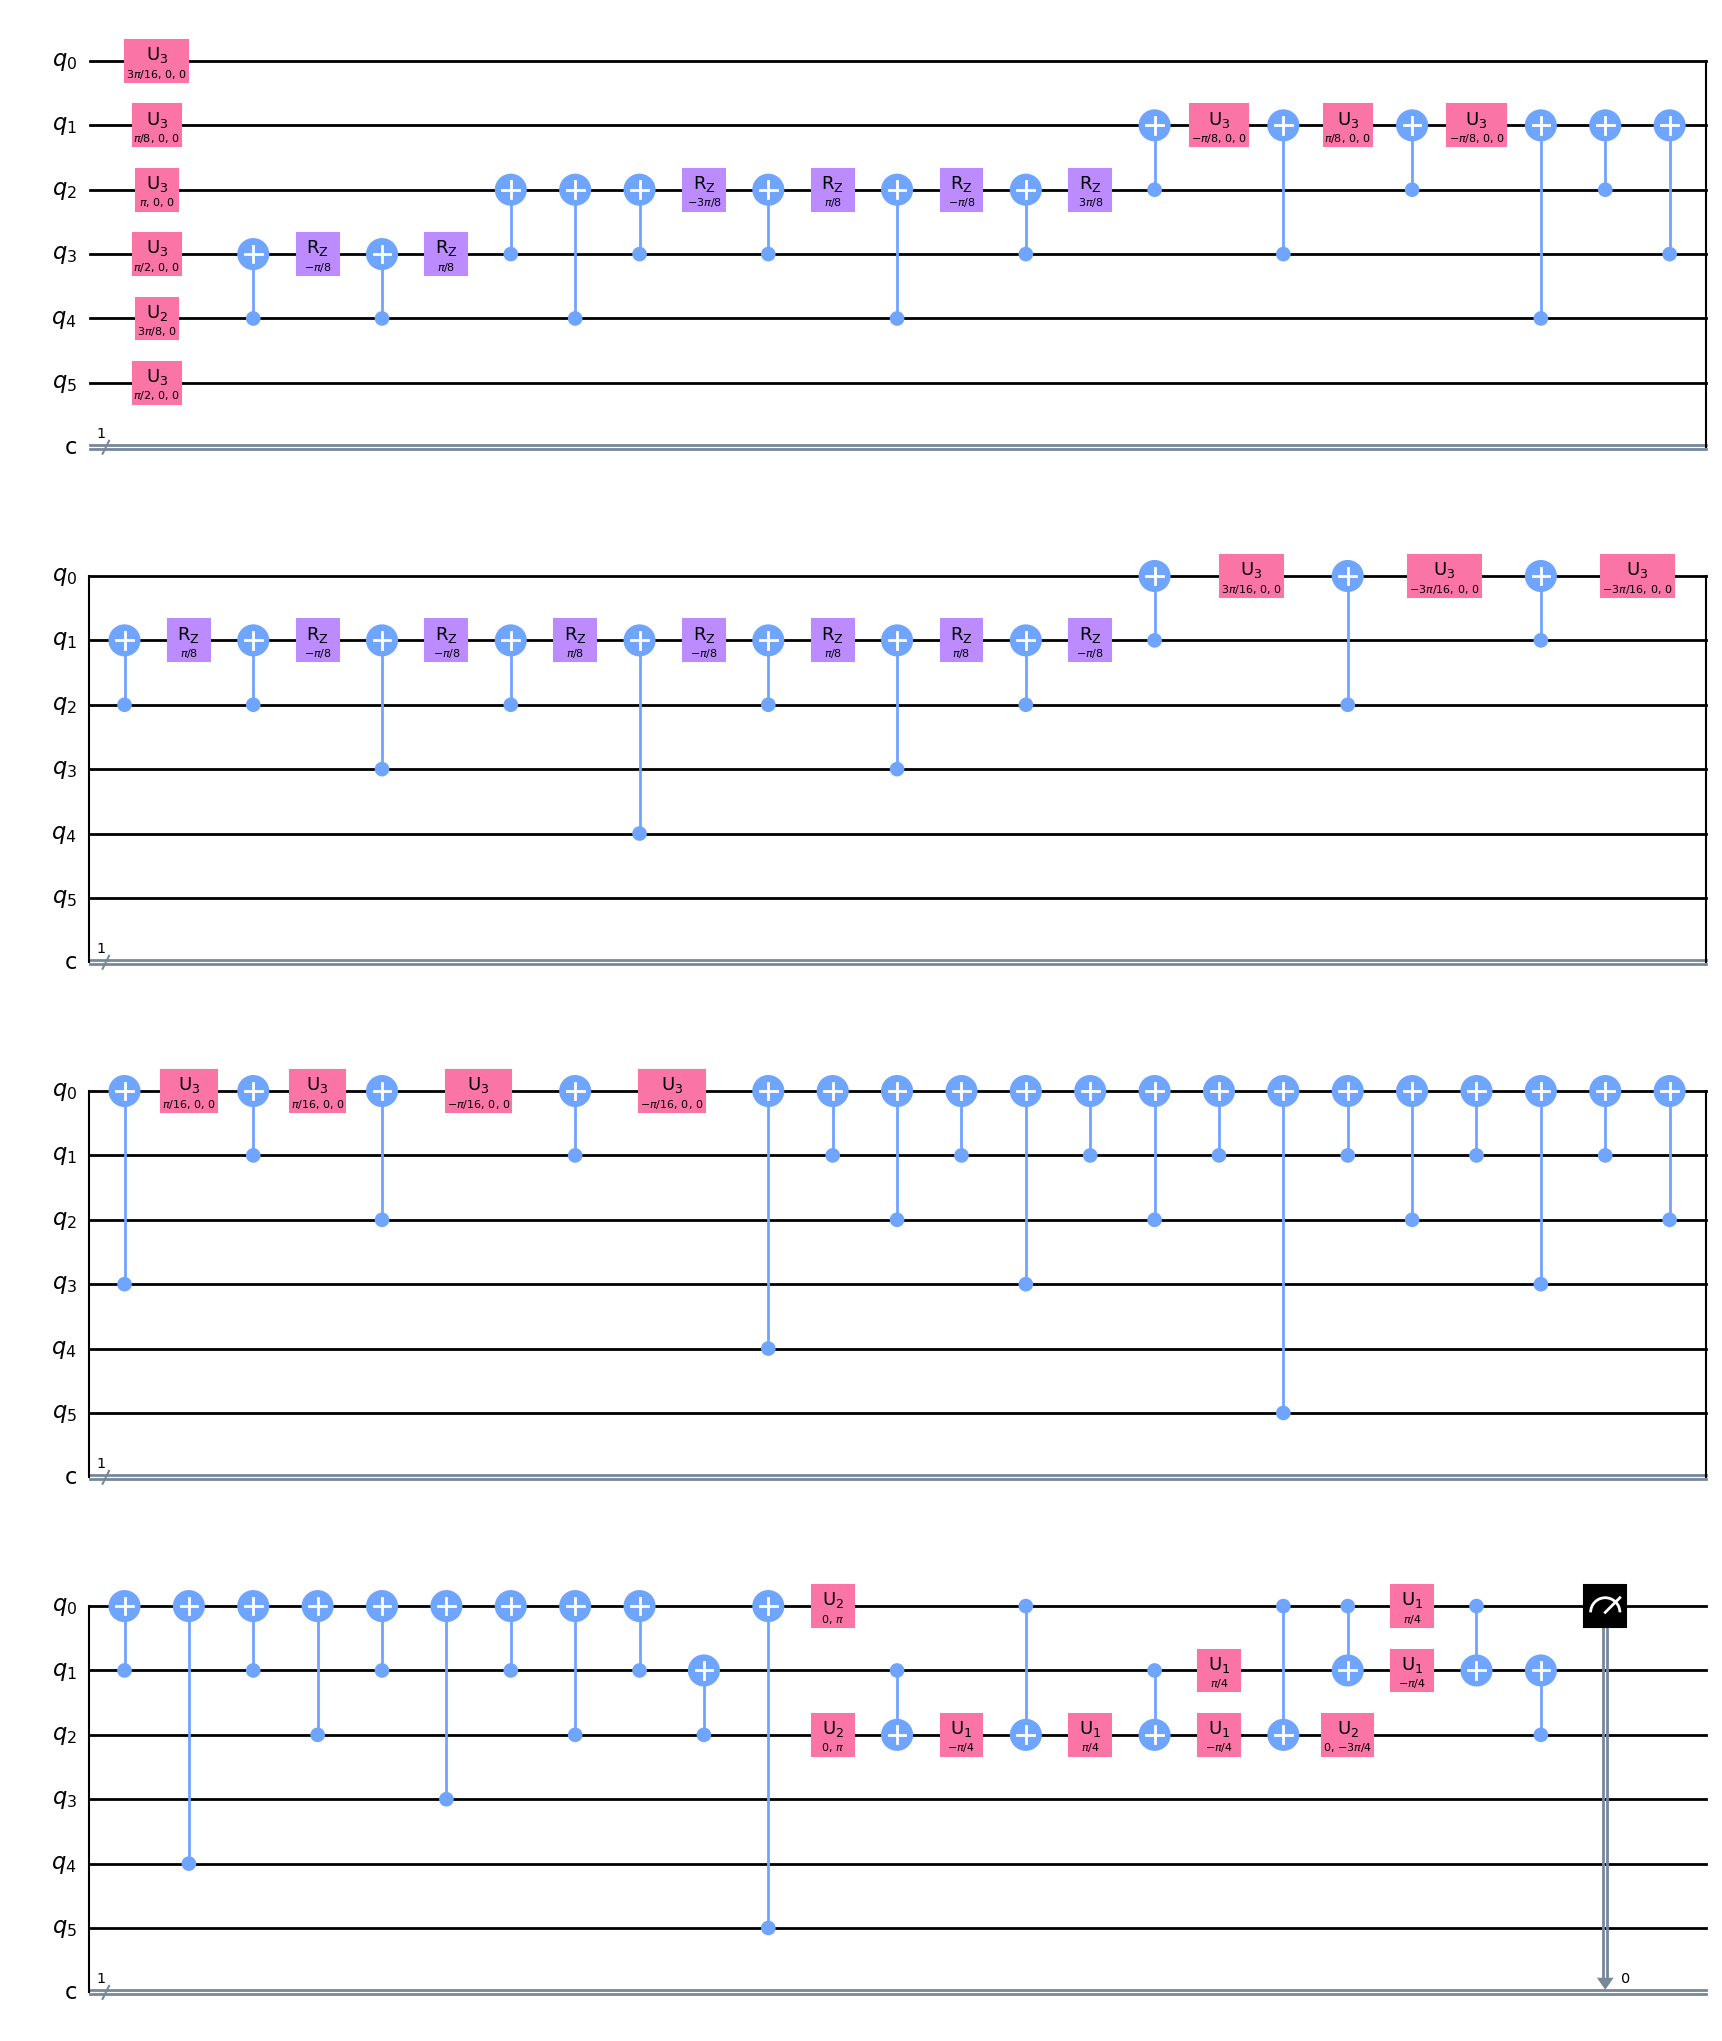

Result(backend_name='cusvaer_simulator_statevector', backend_version='23.10.0', qobj_id='291cb9ce-2f39-442e-bebd-7f659901e3ff', job_id='6b5b1813-055f-40ba-b39c-ddb7632e2b0f', success=True, results=[ExperimentResult(shots=100000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 74916, '0x1': 25084}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5]], n_qubits=6, qreg_sizes=[['q', 6]], clbit_labels=[['c', 0]], memory_slots=1, creg_sizes=[['c', 1]], name='circuit-738', global_phase=0.0, metadata={}), status=DONE, name='circuit-738', seed_simulator=1307251641, time_taken=0.0527796745300293, metadata={})], date=2024-02-25T17:15:43.400077, status=COMPLETED, header=QobjHeader(backend_name='cusvaer_simulator_statevector', backend_version='23.10.0'), mpi_rank=0, num_mpi_processes=1, time_taken=0.05736064910888672, cusvaer_enabled=True)


In [9]:
simulator = Aer.get_backend('aer_simulator_statevector')
compiled = transpile(cos, simulator)
display(compiled.draw(output="mpl"))

shots = 100000

job = simulator.run(compiled,shots=shots)
result = job.result()

print(result)

In [10]:

counts = result.get_counts(cos)
print(counts)

#difference between probabilities compared to 50/50 split
#50/50 split would be a distance of zero indicating high similarity

quantum_similarity = (counts['0']-counts['1'])/(shots)
print(quantum_similarity)

cosine_similarity = one@two/(np.sqrt(one@one)*np.sqrt(two@two))

print(cosine_similarity)


{'0': 74916, '1': 25084}
0.49832
0.4999999999999999
